![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [104]:
import pandas as pd
tashkent_houses = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
tashkent_houses.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [105]:
tashkent_houses.shape

(7565, 7)

In [106]:
tashkent_houses.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [107]:
tashkent_houses.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [108]:
dist_nums = np.arange(1,13)

# Create a mapping dictionary
district_mapping = dict(zip(tashkent_houses['district'].unique(), dist_nums))

# Use the mapping to replace values
tashkent_houses['district'] = tashkent_houses['district'].replace(district_mapping)

tashkent_houses.head()


,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",1,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",2,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",3,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",3,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",3,3,70,3,5,55000


In [109]:
tashkent_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   int64 
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(4), object(3)
memory usage: 413.8+ KB


In [110]:
tashkent_houses['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [111]:
con = (tashkent_houses['size'] == 'Площадьземли:1сот')
tashkent_houses[con] = 100
tashkent_houses['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [112]:
tashkent_houses['price'].unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

In [113]:
con = (tashkent_houses['price'] == 'Договорная')
tashkent_houses[con] = 0
tashkent_houses['price'].unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

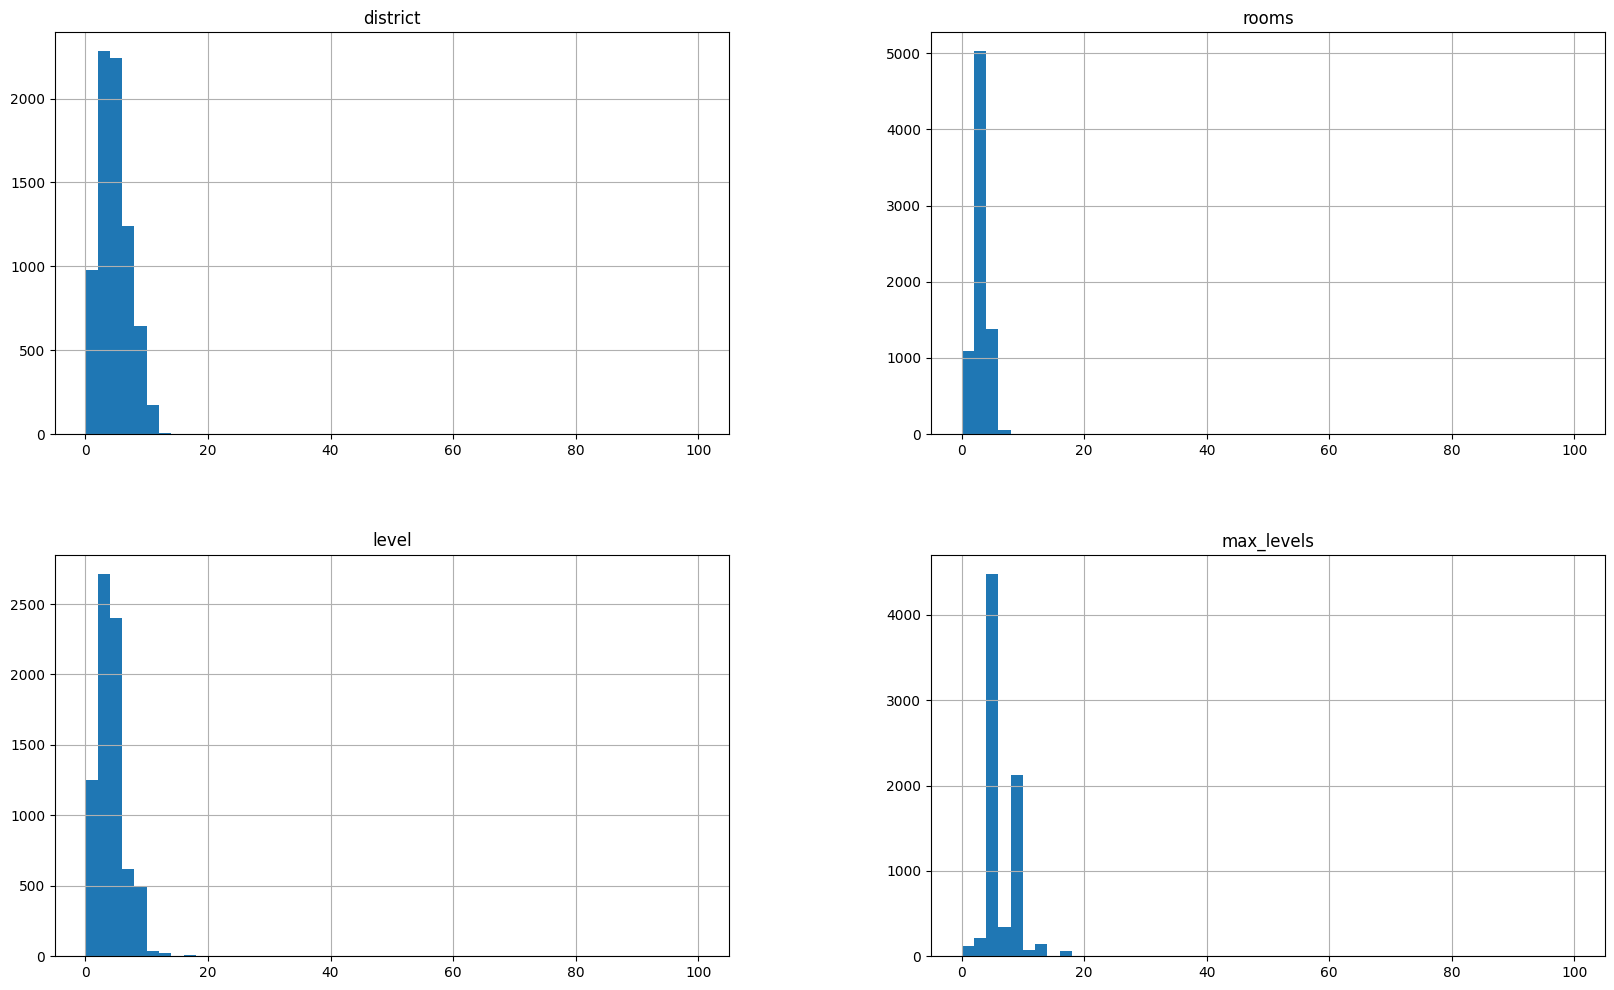

In [114]:
%matplotlib inline
tashkent_houses.hist(bins=50, figsize=(20,12))
plt.show()

LABELLASH

In [115]:
tashkent_houses.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",1,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",2,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",3,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",3,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",3,3,70,3,5,55000


In [116]:
x = tashkent_houses.drop(columns=['location'],axis=1)
y = tashkent_houses['price']

x.head()

,district,rooms,size,level,max_levels,price
0,1,3,57,4,4,52000
1,2,2,52,4,5,56000
2,3,2,42,4,4,37000
3,3,3,65,1,4,49500
4,3,3,70,3,5,55000


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [118]:
print(x.shape,x_train.shape,x_test.shape)

(7565, 6) (6052, 6) (1513, 6)


In [ ]:
x_train.head()

1-option : -- Random forest --

In [129]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)

RandomForestRegressor()

In [130]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [131]:
# Make predictions on the test set
y_pred_train = model.predict(x_train)

In [132]:
# Calculate the accuracy
accuracy_tr = accuracy_score(y_train, y_pred_train)
print("Accuracy on train_set:", accuracy_tr)

Accuracy on train_set: 1.0


In [133]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [135]:
# Calculate the accuracy
# accuracy_test = accuracy_score(y_test, y_pred)
# print("Accuracy on test_set:", accuracy_test)

# Check if y_test contains strings
if any(isinstance(item, str) for item in y_test):
    # Convert to numeric, handling potential errors
    try:
        y_test = y_test.astype(int)  # Try converting to integers
    except ValueError:
        print("Warning: y_test contains non-numeric strings that cannot be directly converted to integers.")
        # Handle the non-numeric strings appropriately (e.g., remove them, map them to numeric values, etc.)

# Now calculate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test_set:", accuracy_test)

Accuracy on test_set: 0.6530072703238599


SVM

In [ ]:
x_train.head()

In [136]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

In [ ]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on training data : ',training_data_accuracy)

In [ ]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [ ]:
print('Accuracy on test data : ',test_data_accuracy)